In [1]:
import pandas as pd
import ray
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.graph_objects as go
from itertools import combinations
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                    StratifiedKFold, StratifiedShuffleSplit,
                                    cross_val_score)
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np
import joblib
from pandarallel import pandarallel
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re

2024-04-11 17:33:16.313949: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 17:33:16.315863: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 17:33:16.346787: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 17:33:16.346809: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 17:33:16.346829: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
def busqueda(expression,column,name=None):
    if column is np.nan:
        return np.nan
    m = re.search(expression,column)
    if m == None:
        return np.nan
    if name != None:
        return name
    else :
        return m.group(0)

In [3]:
df_1 = pd.read_csv("/home/nicolas/nico/Data/Masivas/23_01_2024/ZariDR3_2arcscSkiff.csv")

In [51]:
df_1

,source_id,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmdec,...,astrometric_params_solved,astrometric_excess_noise_sig,phot_variable_flag,skiff_type,Bibcode,ra_skiff,dec_skiff,GroupID_skiff,GroupSize_skiff,Sep_skiff
0,194166159964132352,80.993351,40.911002,0.017015,0.012003,0.240222,0.018702,12.844826,-0.037741,-0.080179,...,31,13.302723,NOT_AVAILABLE,OB,1965LS....C05....0H,05 23 58.40,+40 54 39.6,NaN,NaN,0.049968
1,5338238221171062272,163.567411,-60.227954,0.013068,0.014190,0.439712,0.016401,26.809666,-6.818858,2.057503,...,31,21.009418,NOT_AVAILABLE,B2/5,1976A&AS...23..283L,10 54 16.19,-60 13 40.6,NaN,NaN,0.090802
2,5991500925773854336,242.618755,-44.529381,0.020796,0.013420,0.972101,0.025724,37.789610,4.288532,4.640924,...,31,45.891200,NOT_AVAILABLE,A1V,1978MSS...C02....0H,16 10 28.49,-44 31 45.9,NaN,NaN,0.175313
3,6053315435181795200,184.209370,-64.242408,0.012112,0.012940,0.644200,0.016155,39.875793,-5.453637,0.602280,...,31,22.083277,NOT_AVAILABLE,B8,1976A&AS...23..283L,12 16 50.26,-64 14 32.7,NaN,NaN,0.079767
4,5535459683379880448,115.039318,-42.328756,0.016792,0.018996,1.405670,0.020441,68.766400,-7.148335,6.028711,...,31,61.869250,NOT_AVAILABLE,B9V,1978MSS...C02....0H,07 40 09.45,-42 19 43.7,NaN,NaN,0.234942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090812,5952886799026590848,260.006975,-44.731968,0.015002,0.009510,0.373906,0.018492,20.220068,0.230789,-3.197388,...,31,2.168144,NOT_AVAILABLE,OB-,1971PW&SO...1a...1S,17 20 01.67,-44 43 55.1,25883.0,3.0,0.044806
1090813,5952886799026590848,260.006975,-44.731968,0.015002,0.009510,0.373906,0.018492,20.220068,0.230789,-3.197388,...,31,2.168144,NOT_AVAILABLE,OB,1966VeHei..18....9K,17 20 01.67,-44 43 55.1,25883.0,3.0,0.044806
1090814,5952886799026590848,260.006975,-44.731968,0.015002,0.009510,0.373906,0.018492,20.220068,0.230789,-3.197388,...,31,2.168144,NOT_AVAILABLE,B2II,1961MNRAS.122..239F,17 20 01.67,-44 43 55.1,25883.0,3.0,0.044806
1090815,5595929558744305280,121.897802,-31.260361,0.014454,0.017086,0.196254,0.022061,8.895943,-2.595821,3.798287,...,31,73.684135,NOT_AVAILABLE,OB-,1992AJ....104..590O,08 07 35.48,-31 15 37.4,NaN,NaN,0.138046


In [4]:
skiff = df_1[['source_id',"skiff_type",'Bibcode','GroupID_skiff']].astype(str)

In [5]:
skiff['skiff_type'] = skiff['skiff_type'].replace('nan', np.nan)
skiff['Bibcode'] = skiff['Bibcode'].replace('nan', np.nan)
skiff['GroupID_skiff'] = skiff['GroupID_skiff'].replace('nan', np.nan)

In [6]:
skiff = skiff.loc[skiff['skiff_type'].notna()]

In [7]:
skiff["skiff_mk"] = skiff.apply(lambda row: busqueda(r"^(?!.*[+/])[a-zA-Z]\d+(?:\.\d+)?",row["skiff_type"]),axis=1)

In [8]:
#problema con la regular expression que solucionare de esta forma

In [9]:
skiff.loc[(skiff['skiff_mk'].isna())&(skiff['skiff_type'].str[:2]=='em'),'skiff_mk'] = 'em_WR_Be'
skiff.loc[skiff['skiff_mk'].isna(),'skiff_mk'] = skiff.loc[skiff['skiff_mk'].isna()].apply(lambda row: busqueda(r"WR|WN|WC", row["skiff_type"],'em_WR_Be'), axis=1)
skiff.loc[skiff['skiff_mk'].isna(),'skiff_mk'] = skiff.loc[skiff['skiff_mk'].isna()].apply(lambda row: busqueda(r"Be", row["skiff_type"],'em_WR_Be'), axis=1)
skiff.loc[skiff['skiff_mk'].isna(),'skiff_mk'] = skiff.loc[skiff['skiff_mk'].isna()].apply(lambda row: busqueda(r"OB", row["skiff_type"]), axis=1)

In [11]:
skiff.loc[(skiff['skiff_mk'].isna())&(skiff['skiff_type'].str[0]=='h'),'skiff_mk'] = skiff.loc[(skiff['skiff_mk'].isna())&(skiff['skiff_type'].str[0]=='h')]['skiff_type'].str[1:3]

In [12]:
def busqueda_2(pattern, string, default=None):
    match = re.search(pattern, string)
    if match:
        return match.group(1)  # Retornamos el primer grupo de captura
    return default

skiff.loc[skiff['skiff_mk'].isna(),'skiff_mk'] = skiff.loc[skiff['skiff_mk'].isna()].apply(lambda row: busqueda_2(r"^(.*?)(?=(V|IV|III|II|Ia|Ib|Iab)(?:/(V|IV|III|II|Ia|Ib|Iab))?$)", row["skiff_type"]), axis=1)


In [13]:
skiff.loc[skiff['skiff_mk'].isna(),'skiff_mk'] = skiff.loc[skiff['skiff_mk'].isna()].apply(lambda row: busqueda(r"^(O|B|A|F|G|K|M)$", row["skiff_type"]), axis=1)


In [14]:
skiff.loc[(skiff['skiff_type']=='Ofe'),'skiff_mk'] = 'em_WR_Be'

In [15]:
skiff.loc[skiff['skiff_mk'].isna(),'skiff_mk'] = skiff.loc[skiff['skiff_mk'].isna()].apply(lambda row: busqueda(r"e", row["skiff_type"],'em_WR_Be'), axis=1)


In [16]:
skiff.loc[skiff['skiff_mk'].isna(),'skiff_mk'] = skiff.loc[skiff['skiff_mk'].isna()].apply(lambda row: busqueda(r"^(O|B|A|F|G|K|M)(\d*(\.\d*)?)?(\/(\d*(\.\d*)?)?)?", row["skiff_type"]), axis=1)

In [17]:
skiff_mk = skiff.loc[(skiff['skiff_mk']!='em_WR_Be')&(skiff['skiff_mk']!='OB')&(skiff['skiff_mk'].notna())]

In [18]:
#correccion de las regular expression que dejaban tipos espectrales de la forma 
#O2/B0 --> O2/
correccion = skiff_mk.loc[skiff_mk["skiff_mk"].str[-1] =="/"].apply(lambda row: busqueda(r"[a-zA-Z]\d*(?:\.\d+)?/[a-zA-Z]\d*(?:\.\d+)?", row["skiff_type"]), axis=1)
skiff_mk.loc[skiff_mk["skiff_mk"].str[-1] =="/","skiff_mk"] = correccion

In [19]:
skiff_mk['skiff_mk'] = skiff_mk['skiff_mk'].str.replace('.', '')

/tmp/ipykernel_8853/2992802417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skiff_mk['skiff_mk'] = skiff_mk['skiff_mk'].str.replace('.', '')


In [20]:
replace_map = {
    'O': '0.',
    'B': '1.',
    'A': '2.',
    'F': '3.',
    'G': '4.',
    'K': '5.',
    'M': '6.'
}

In [21]:
skiff_mk['skiff_mk'] = skiff_mk['skiff_mk'].replace(replace_map, regex=True)


/tmp/ipykernel_8853/2936214468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skiff_mk['skiff_mk'] = skiff_mk['skiff_mk'].replace(replace_map, regex=True)


In [22]:
import re

def extract_first_float(s):
    match = re.search(r"(\d{1,2}(?:\.\d{1,2})?)", s)
    return float(match.group()) if match else None

s = '0.97Ib + 0.9'
number = extract_first_float(s)
print(number)


0.97


In [23]:
skiff_mk = skiff_mk[skiff_mk['skiff_mk'].str.split('/').str[0].str.len() !=1].reset_index(drop=True)

In [24]:
n1 = skiff_mk['skiff_mk'].str.split('/').str[0].reset_index(drop=True)

In [25]:
n1 = n1.apply(extract_first_float)

In [26]:
entero = n1.astype(str).str.split('.').str[0]
decimal = n1.astype(str).str.split('.').str[1]

In [27]:
n2 = skiff_mk['skiff_mk'].str.split('/').str[1].replace(np.nan,0).replace('',0).astype(str).reset_index(drop=True)

In [28]:
decimal  = '0.'+decimal
n2  = '0.'+n2

In [29]:
n2 = n2.apply(extract_first_float)
decimal = decimal.apply(extract_first_float)

In [30]:
n2.loc[n2 > 0] = n2.loc[n2 > 0] / 2
decimal.loc[n2 > 0] = decimal.loc[n2 > 0] / 2


In [31]:
skiff_mk['label'] = entero.astype(int) + (decimal + n2)

In [32]:
correccion_00 = skiff_mk.loc[skiff_mk["label"]==0.0].apply(lambda row: busqueda(r"O(?:N|C)?\d*(?:\.\d+)?",row["skiff_type"]),axis=1)

In [33]:
correccion_00 = correccion_00.str.replace("N","").str.replace("C","").str.replace(".","").str.replace("O","0")

In [34]:
correccion_00 = correccion_00.str.replace(r'^(0)', r'\1.', regex=True)

In [35]:
 skiff_mk.loc[skiff_mk["label"]==0.0,"label"] = pd.to_numeric(correccion_00)

In [36]:
import numpy as np

# Define los posibles valores
values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Selecciona las filas donde la longitud de 'skiff_type' es 1
mask = skiff_mk['skiff_type'].str.len() == 1

# Suma el valor en 'skiff_mk' con un valor aleatorio de 'values' y asigna el resultado a 'label'
skiff_mk.loc[mask, 'label'] = skiff_mk.loc[mask, 'label'] + np.random.choice(values, size=sum(mask))



In [37]:
skiff_mk["year"] = skiff_mk.apply(lambda row: busqueda(r"\d{4}",row["Bibcode"]),axis=1)  

In [38]:
skiff_mk["arxiv"] = skiff_mk.apply(lambda row: busqueda(r"arXiv",row["Bibcode"]),axis=1)  

In [39]:
skiff_mk.loc[skiff_mk["arxiv"].notna(),"year"] = "20" + skiff_mk.loc[skiff_mk["arxiv"].notna()]["year"].astype("str").str[:2]

In [40]:
skiff_mk["year"] = pd.to_numeric(skiff_mk["year"],errors="coerce")

In [41]:
# si realmente es el mismo objeto
#keywoard de los papers S/N y/o R
# Pasar a numeros los tipos espectrales redondear!
# Escribir en la tesis como determinar tipos espectrales
stars_unicas = skiff_mk.loc[skiff_mk["GroupID_skiff"].isna()]
star_no_unicas = skiff_mk.loc[skiff_mk["GroupID_skiff"].notna()]
#df_1 = pd.concat([stars_unicas,star_no_unicas])

In [42]:
star_no_unicas_sp = star_no_unicas.groupby("GroupID_skiff")["skiff_type"].unique().reset_index()

In [43]:
star_no_unicas_sp = star_no_unicas_sp.rename(columns={"skiff_type":"skiff_type_list"})

In [44]:
star_no_unicas = star_no_unicas.merge(star_no_unicas_sp,how="left",on="GroupID_skiff")

In [45]:
# Calcula la desviación estándar dentro de cada grupo
std_by_group = star_no_unicas.groupby("GroupID_skiff")["label"].transform("std")

# Agrega la columna al DataFrame
star_no_unicas["std_sp"] = std_by_group

In [46]:
star_no_unicas = star_no_unicas.loc[(star_no_unicas["std_sp"]<0.5)|(star_no_unicas["std_sp"].isna())]

In [47]:
mean_by_group = star_no_unicas.groupby("GroupID_skiff")["label"].transform("mean")

# Agrega la columna al DataFrame
star_no_unicas["label"] = mean_by_group

In [48]:
star_no_unicas = star_no_unicas.sort_values(by="year",ascending=False).drop_duplicates(subset="GroupID_skiff",keep='first')

In [49]:
skiff_mk = pd.concat([star_no_unicas,stars_unicas])

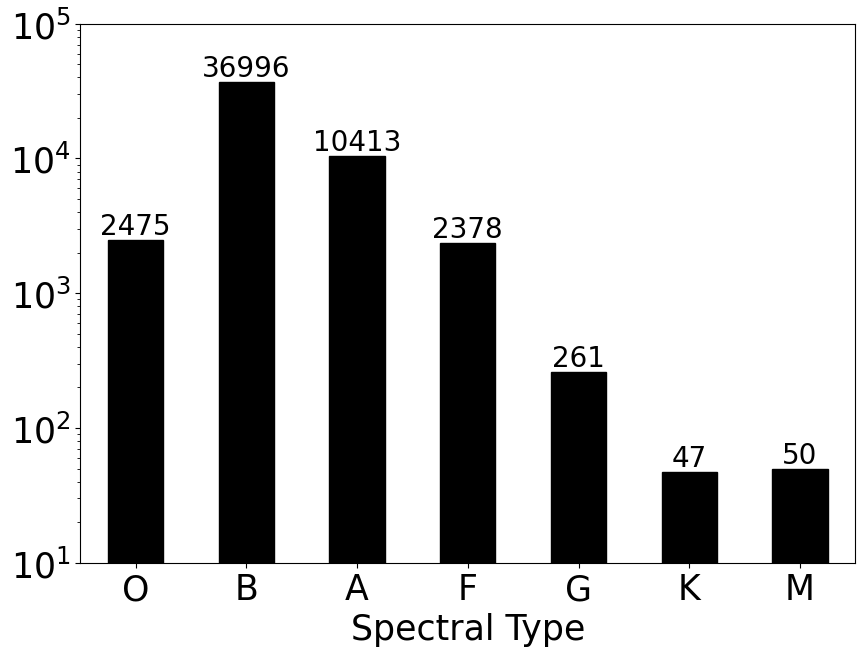

In [50]:
import pandas as pd

# Define the bin edges for categorization
bins = [0, 1, 2, 3, 4, 5, 6, 7]

# Use pd.cut to categorize the stars into the defined bins
skiff_mk['binned'] = pd.cut(skiff_mk['label'], bins, labels=['O', 'B', 'A', 'F', 'G', 'K', 'M'])

# Count the number of occurrences in each bin
bin_counts = skiff_mk['binned'].value_counts().sort_index()

# We'll use the same sample data as before. Replace with your actual dataframe `skiff_mk['label']`.

# Calculate the percentage for each bin
bin_percentages = bin_counts

# Plot the bar chart with a logarithmic scale
plt.figure(figsize=(10, 7))
ax = bin_counts.plot(kind='bar', color='black', edgecolor='black', logy=True)

# Adding labels and title
plt.xlabel('Spectral Type',size=25)
plt.tick_params(axis='both', which='major', labelsize=25)  # Cambia '12' al tamaño deseado
# Annotate the percentage on top of each bar
# Anotar el conteo de cada bin encima de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=20)

# Configuración adicional del eje y y mostrar el gráfico
plt.gca().set_yticks([10, 100, 1000, 10000, 100000])
ax.set_xticklabels(bin_percentages.index, rotation=0)
plt.savefig("Skiff_27_dic.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [52]:
df_1.drop(columns=['Bibcode', 'GroupID_skiff'], inplace=True)


In [55]:
# Convierte la columna 'source_id_1' a int64 en ambas DataFrames
df_1['source_id'] = df_1['source_id'].astype(int)
skiff_mk['source_id'] = skiff_mk['source_id'].astype(int)

# Ahora realiza el merge


In [56]:
#skiff_mk.drop(columns=["year"],inplace=True)

In [57]:
skiff_mk.rename(columns={"label":"numeric_sp"},inplace=True)

In [58]:
df_1 = df_1.merge(skiff_mk[["source_id","numeric_sp","std_sp","skiff_type_list"]], on=['source_id'], how='left')

In [59]:
df_1

,source_id,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmdec,...,astrometric_excess_noise_sig,phot_variable_flag,skiff_type,ra_skiff,dec_skiff,GroupSize_skiff,Sep_skiff,numeric_sp,std_sp,skiff_type_list
0,194166159964132352,80.993351,40.911002,0.017015,0.012003,0.240222,0.018702,12.844826,-0.037741,-0.080179,...,13.302723,NOT_AVAILABLE,OB,05 23 58.40,+40 54 39.6,NaN,0.049968,NaN,NaN,NaN
1,5338238221171062272,163.567411,-60.227954,0.013068,0.014190,0.439712,0.016401,26.809666,-6.818858,2.057503,...,21.009418,NOT_AVAILABLE,B2/5,10 54 16.19,-60 13 40.6,NaN,0.090802,1.35,NaN,NaN
2,5991500925773854336,242.618755,-44.529381,0.020796,0.013420,0.972101,0.025724,37.789610,4.288532,4.640924,...,45.891200,NOT_AVAILABLE,A1V,16 10 28.49,-44 31 45.9,NaN,0.175313,2.10,NaN,NaN
3,6053315435181795200,184.209370,-64.242408,0.012112,0.012940,0.644200,0.016155,39.875793,-5.453637,0.602280,...,22.083277,NOT_AVAILABLE,B8,12 16 50.26,-64 14 32.7,NaN,0.079767,1.80,NaN,NaN
4,5535459683379880448,115.039318,-42.328756,0.016792,0.018996,1.405670,0.020441,68.766400,-7.148335,6.028711,...,61.869250,NOT_AVAILABLE,B9V,07 40 09.45,-42 19 43.7,NaN,0.234942,1.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090812,5952886799026590848,260.006975,-44.731968,0.015002,0.009510,0.373906,0.018492,20.220068,0.230789,-3.197388,...,2.168144,NOT_AVAILABLE,OB-,17 20 01.67,-44 43 55.1,3.0,0.044806,1.20,NaN,[B2II]
1090813,5952886799026590848,260.006975,-44.731968,0.015002,0.009510,0.373906,0.018492,20.220068,0.230789,-3.197388,...,2.168144,NOT_AVAILABLE,OB,17 20 01.67,-44 43 55.1,3.0,0.044806,1.20,NaN,[B2II]
1090814,5952886799026590848,260.006975,-44.731968,0.015002,0.009510,0.373906,0.018492,20.220068,0.230789,-3.197388,...,2.168144,NOT_AVAILABLE,B2II,17 20 01.67,-44 43 55.1,3.0,0.044806,1.20,NaN,[B2II]
1090815,5595929558744305280,121.897802,-31.260361,0.014454,0.017086,0.196254,0.022061,8.895943,-2.595821,3.798287,...,73.684135,NOT_AVAILABLE,OB-,08 07 35.48,-31 15 37.4,NaN,0.138046,NaN,NaN,NaN


In [509]:
df_1.to_csv("/home/nicolas/nico/Data/Masivas/data_correccion_zari/ZariDR3_Prep_2arcscSkiff.csv",index=False)